Imports and data preprocessing

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv ('crash_data.csv')

# Split crash data into 3 tables representing the crash incident, the vehicles inovled, and the participants involved.

CrashesDF = df[df['Record Type'] == 1]
VehiclesDF = df[df['Record Type'] == 2]
ParticipantsDF = df[df['Record Type'] == 3]

CrashesDF = CrashesDF.dropna(axis=1,how='all')
VehiclesDF = VehiclesDF.dropna(axis=1,how='all')
ParticipantsDF = ParticipantsDF.dropna(axis=1,how='all')


Existance Assertation: Every crash occured on a date

In [2]:

no_crash_day = CrashesDF[CrashesDF['Crash Day'].isnull()]

if no_crash_day.shape[0] == 0:
    print("There are no violations of the assertation that there should be a Crash Day for every crash")



There are no violations of the assertation that there should be a Crash Day for every crash


Limit Assertation: Make sure hour is between 0 and 24, and not 99 since 99 is intended to stand for "Hour Unkown"


In [3]:
invalid_hour = CrashesDF[((CrashesDF['Crash Hour'] < 0 ) | (df['Crash Hour'] > 24 )) & (df['Crash Hour'] != 99 ) ]

if invalid_hour.shape[0] == 0:
    print("There are no limit violations in Crash Hour")

There are no limit violations in Crash Hour


C:\Users\liqui\AppData\Local\Temp/ipykernel_25008/2063888876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_hour = CrashesDF[((CrashesDF['Crash Hour'] < 0 ) | (df['Crash Hour'] > 24 )) & (df['Crash Hour'] != 99 ) ]


Intra-record assertation: every Crash ID in CrashesDF should be unique

In [4]:

if CrashesDF['Crash ID'].is_unique:
    print("There are no violations of the intra-record assertation that every Crash ID in CrashesDF should be unique")

There are no violations of the intra-record assertation that every Crash ID in CrashesDF should be unique


Inter-record assertation 1: Every Crash ID should have a record in CrashesDF, VehiclesDF, and ParticapantsDF

In [5]:
for index, row in CrashesDF.iterrows():
    violation = False
    crash_ID = row['Crash ID']
    crash_ID = np.int64(crash_ID)

    if crash_ID not in VehiclesDF.values:
        print("Crash ID not found!")
        violation = True

    if crash_ID not in ParticipantsDF.values:
        print("Crash ID not found!")
        violation = True
    
if violation == False:
    print("There are no violations of the inter-record assertation that every crash ID should have a record in CrashesDF, VehiclesDF, and ParticipantsDF.")


There are no violations of the inter-record assertation that every crash ID should have a record in CrashesDF, VehiclesDF, and ParticipantsDF.


Inter-record assertaion 2: There are not more vehicles than participants. 

In [ ]:
if ParticipantsDF.shape[0] >= VehiclesDF.shape[0]:
    print("There are no violations of the summary assertation that there should not be more vehicles than participants")

Summary Assertation 1: There should not be millions of participants. 

In [12]:
total_participants = ParticipantsDF.shape[0]

if total_participants < 1000000000:
    print("There are a total of", total_participants, "participants which is not in violation of the assertation that there should not be milllions of participants")

There are a total of 1216 participants which is not in violation of the assertation that there should not be milllions of participants


Summary Assertation 2: There should not be millions of crashes.

In [11]:

total_crashes = CrashesDF.shape[0]

if total_crashes < 1000000000:
    print("There are a total of", total_crashes, "crashes which is not in violation of the assertation that there should not be milllions of crashes")

There are a total of 508 crashes which is not in violation of the assertation that there should not be milllions of crashes


Statistical Distribution Assertion 1: There should not be radical anomalies in the crash hour distribution. Indeed, it looks like a normal distribution centered around 15:00.

<AxesSubplot:>

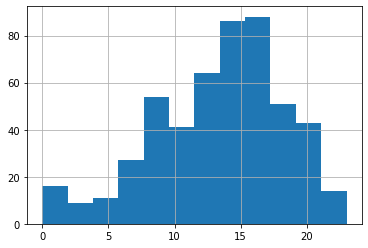

In [7]:

crash_hour = CrashesDF[(CrashesDF['Crash Hour'] != 99)]
crash_hour = crash_hour['Crash Hour']
crash_hour.hist(bins=12)

Statistical Distribution Assertion 2: There should not be any radical anomolies for the months crashes occured. As expected, there were more during winter, but everything looks as it should.

<AxesSubplot:>

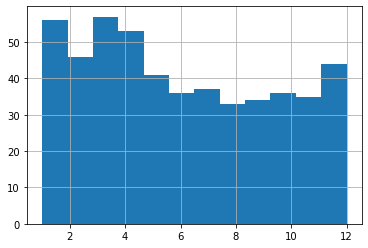

In [8]:
crash_month = CrashesDF['Crash Month']
crash_month.hist(bins=12)

Export dataframes as .csv files

In [14]:
CrashesDF.to_csv("Crash data.csv")
VehiclesDF.to_csv("Vehicle data.csv")
ParticipantsDF.to_csv("Participant data.csv")